In [49]:
import tensorflow as tf
import tensorflow_hub as hub

In [50]:
import numpy as np
import matplotlib.pyplot as plt

In [51]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [52]:
import pathlib
data_train = 'D:/07 Skripsi/dataset/a-train_images'
data_test = 'D:/07 Skripsi/dataset/b-test_images'

In [54]:
 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
            rescale=1./255,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=False)
test_datagen = ImageDataGenerator(rescale=1./255)

In [55]:
train_generator = train_datagen.flow_from_directory(
            data_train,
            target_size=(150,150),
            class_mode='categorical',
            batch_size=64)
test_generator = test_datagen.flow_from_directory(
            data_test,
            target_size=(150,150),
            class_mode='categorical',
            batch_size=64)

Found 3475 images belonging to 6 classes.
Found 2174 images belonging to 6 classes.


In [56]:
# from tensorflow import keras

# train_ds = keras.utils.image_dataset_from_directory(
#     data_train,
#     validation_split=0.2,
#     subset="training",
#     seed=123,
#     batch_size=64
# )

# val_ds = keras.utils.image_dataset_from_directory(
#     data_test,
#     validation_split=0.2,
#     subset="validation",
#     seed=123,
#     batch_size=64
# )

In [59]:
# #preview data
# class_names = train_generator.class_names
# print(class_names)

# plt.figure(figsize=(10,10))
# for images, labels in train_generator.take(1):
#     for i in range (12):
#         ax=plt.subplot(4,4,i+1)
#         plt.imshow(images[i].numpy().astype("uint8"))
#         plt.title(class_names[labels[i]])
#         plt.axis("off")

In [61]:
# preprocessing = keras.Sequential([
#     keras.layers.Resizing(150,150),
#     keras.layers.Rescaling(1./255)
# ])

In [62]:
# data_augmentation = keras.Sequential([
#     keras.layers.RandomFlip("horizontal_and_vertical"),
#     keras.layers.RandomRotation(0.2),
#     keras.layers.RandomTranslation(0.2,0.2),
#     keras.layers.RandomZoom(0.2),
#     keras.layers.RandomBrightness(0.4),
#     keras.layers.RandomContrast(0.4)
# ])

# train_ds.map(lambda x,y: (data_augmentation(x, training=True), y), num_parallel_calls=tf.data.AUTOTUNE)

In [63]:
base_model = ResNet50(input_shape = (150,150,3),
                  include_top=False,
                  weights=None)

In [64]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 156, 156, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 75, 75, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 75, 75, 64)   256         ['conv1_conv[0][0]']       

In [65]:
for layer in base_model.layers:
    layer.trainable=False

In [66]:
from tensorflow.keras import Model
from tensorflow.keras import layers

In [68]:
x = layers.Flatten()(base_model.output)
x = layers.Dense(128, activation = 'relu')(x)
x = layers.Dense(6, activation = 'softmax')(x)

model = Model (base_model.input,x)
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 156, 156, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 75, 75, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 75, 75, 64)   256         ['conv1_conv[0][0]']       

In [89]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer = Adam(lr=0.0001),
             loss = 'categorical_crossentropy',
             metrics = ["accuracy"])

In [90]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [91]:
# #prefetch data 
# train_ds = train_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
# val_ds = val_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

In [92]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 156, 156, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 75, 75, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 75, 75, 64)   256         ['conv1_conv[0][0]']       

In [95]:
history = model.fit(
        train_generator,
        epochs = 10,
        validation_data = test_generator,
        verbose = 2)

Epoch 1/10
55/55 - 852s - loss: 1.0531 - accuracy: 0.5994 - val_loss: 1.1354 - val_accuracy: 0.5400 - 852s/epoch - 15s/step
Epoch 2/10
55/55 - 674s - loss: 1.0510 - accuracy: 0.6006 - val_loss: 1.1266 - val_accuracy: 0.5644 - 674s/epoch - 12s/step
Epoch 3/10
55/55 - 538s - loss: 1.0469 - accuracy: 0.6000 - val_loss: 1.1234 - val_accuracy: 0.5566 - 538s/epoch - 10s/step
Epoch 4/10
55/55 - 466s - loss: 1.0399 - accuracy: 0.6055 - val_loss: 1.1379 - val_accuracy: 0.5621 - 466s/epoch - 8s/step
Epoch 5/10
55/55 - 423s - loss: 1.0370 - accuracy: 0.6046 - val_loss: 1.1398 - val_accuracy: 0.5400 - 423s/epoch - 8s/step
Epoch 6/10
55/55 - 533s - loss: 1.0373 - accuracy: 0.6020 - val_loss: 1.1159 - val_accuracy: 0.5607 - 533s/epoch - 10s/step
Epoch 7/10
55/55 - 480s - loss: 1.0270 - accuracy: 0.6158 - val_loss: 1.1250 - val_accuracy: 0.5593 - 480s/epoch - 9s/step
Epoch 8/10
55/55 - 473s - loss: 1.0365 - accuracy: 0.6046 - val_loss: 1.1258 - val_accuracy: 0.5695 - 473s/epoch - 9s/step
Epoch 9/10
5

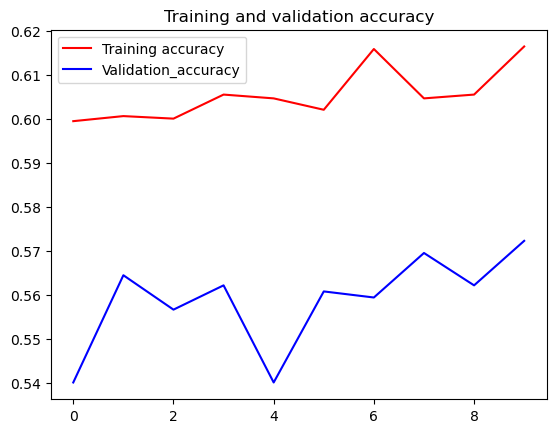

<Figure size 640x480 with 0 Axes>

In [96]:
#plot the result 
 
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation_accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [28]:
1

1